In [1]:
SAMPLE_SIZE = 100_000
DTYPES = {
    'date_time': 'string',
    'site_name': 'uint8',
    'posa_continent': 'uint8',
    'user_location_country': 'uint8',
    'user_location_region': 'uint16',
    'user_location_city': 'uint16',
    'orig_destination_distance': 'float32',
    'user_id': 'uint32',
    'is_mobile': 'bool',
    'is_package': 'bool',
    'channel': 'uint8',
    'srch_ci': 'string',
    'srch_co': 'string',
    'srch_adults_cnt': 'uint8',
    'srch_children_cnt': 'uint8',
    'srch_rm_cnt': 'uint8',
    'srch_destination_id': 'uint16',
    'srch_destination_type_id': 'uint8',
    'is_booking': 'bool',
    'cnt': 'uint16',
    'hotel_continent': 'uint8',
    'hotel_country': 'uint8',
    'hotel_market': 'uint16',
    'hotel_cluster': 'uint8',
}
DATETIME_COLUMNS = ['date_time', 'srch_ci', 'srch_co']
BOOLEAN_COLUMNS = ['is_booking', 'is_mobile', 'is_package']

In [2]:
import numpy as np
import polars as pl


def map_to_polars(dtype: str):
    conversion = {
        'string': pl.String,
        'uint8': pl.UInt8,
        'uint16': pl.UInt16,
        'uint32': pl.UInt32,
        'float32': pl.Float32,
        'bool': pl.UInt8 
    }
    return conversion[dtype]

dtypes = {k: map_to_polars(v) for k, v in DTYPES.items()}
df = pl.read_csv('../../data/raw/train.csv', dtypes=dtypes)
df = df.with_columns(
    *[pl.col(col).str.to_datetime() for col in DATETIME_COLUMNS]
)
for col in BOOLEAN_COLUMNS:
    df = df.replace(col, df[col] == 1)

C:\Users\tyoma\AppData\Local\Temp\ipykernel_6720\122666053.py:22: DeprecationWarning: `replace` is deprecated. DataFrame.replace is deprecated and will be removed in a future version. Please use
    df = df.with_columns(new_column.alias(column_name))
instead.
  df = df.replace(col, df[col] == 1)


In [3]:
df.head(10)

shape: (10, 24)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ date_time ┆ site_name ┆ posa_cont ┆ user_loca ┆ … ┆ hotel_con ┆ hotel_cou ┆ hotel_mar ┆ hotel_cl │
│ ---       ┆ ---       ┆ inent     ┆ tion_coun ┆   ┆ tinent    ┆ ntry      ┆ ket       ┆ uster    │
│ datetime[ ┆ u8        ┆ ---       ┆ try       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ μs]       ┆           ┆ u8        ┆ ---       ┆   ┆ u8        ┆ u8        ┆ u16       ┆ u8       │
│           ┆           ┆           ┆ u8        ┆   ┆           ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 2014-08-1 ┆ 2         ┆ 3         ┆ 66        ┆ … ┆ 2         ┆ 50        ┆ 628       ┆ 1        │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 07:46:59  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2014-08-1 ┆ 2         ┆ 3         ┆ 66        ┆ … ┆ 2         ┆ 50        ┆ 628       ┆ 1        │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 08:22:12  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2014-08-1 ┆ 2         ┆ 3         ┆ 66        ┆ … ┆ 2         ┆ 50        ┆ 628       ┆ 1        │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 08:24:33  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2014-08-0 ┆ 2         ┆ 3         ┆ 66        ┆ … ┆ 2         ┆ 50        ┆ 1457      ┆ 80       │
│ 9         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 18:05:16  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2014-08-0 ┆ 2         ┆ 3         ┆ 66        ┆ … ┆ 2         ┆ 50        ┆ 1457      ┆ 21       │
│ 9         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 18:08:18  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2014-08-0 ┆ 2         ┆ 3         ┆ 66        ┆ … ┆ 2         ┆ 50        ┆ 1457      ┆ 92       │
│ 9         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 18:13:12  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2014-07-1 ┆ 2         ┆ 3         ┆ 66        ┆ … ┆ 2         ┆ 50        ┆ 675       ┆ 41       │
│ 6         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 09:42:23  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2014-07-1 ┆ 2         ┆ 3         ┆ 66        ┆ … ┆ 2         ┆ 50        ┆ 675       ┆ 41       │
│ 6         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 09:45:48  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2014-07-1 ┆ 2         ┆ 3         ┆ 66        ┆ … ┆ 2         ┆ 50        ┆ 675       ┆ 69       │
│ 6         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 09:52:11  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2014-07-1 ┆ 2         ┆ 3         ┆ 66        ┆ … ┆ 2         ┆ 50        ┆ 675       ┆ 70       │
│ 6         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 09:55:24  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [4]:
df_sample = df.sample(SAMPLE_SIZE)

In [ ]:
from ydata_profiling import ProfileReport

profile_report = ProfileReport(df_sample, title='Data profile report', explorative=True)

In [ ]:
profile_report.to_file('../reports/report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
from pandas import Series
from plotly.express import bar


nulls = Series(df.null_count().row(0), index=df.columns)
bar((nulls.sort_values(ascending=False) * 100) / len(df), title='Missing values (in %, to 100)', orientation='h', labels={
    'x': 'Missing values (to 100%)',
    'y': 'Column'
})

In [4]:
numerical_columns = [column for column in df.columns if df[column].dtype not in [pl.Boolean, pl.String, pl.Datetime]]
categorical_columns = [column for column in df.columns if df[column].dtype in [pl.Boolean, pl.String]]
datetime_columns = [column for column in df.columns if column not in numerical_columns and column not in categorical_columns]

In [5]:
df = df.with_columns(
    co_ci_diff=(pl.col('srch_co') - pl.col('srch_ci')).dt.total_days().cast(pl.Int16),
    ci_dt_diff=(pl.col('srch_ci') - pl.col('date_time')).dt.total_days().cast(pl.Int32)
)

In [6]:
df.filter(df['ci_dt_diff'] < 0).head(20)

shape: (20, 26)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ date_time ┆ site_name ┆ posa_cont ┆ user_loca ┆ … ┆ hotel_mar ┆ hotel_clu ┆ co_ci_dif ┆ ci_dt_di │
│ ---       ┆ ---       ┆ inent     ┆ tion_coun ┆   ┆ ket       ┆ ster      ┆ f         ┆ ff       │
│ datetime[ ┆ u8        ┆ ---       ┆ try       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ μs]       ┆           ┆ u8        ┆ ---       ┆   ┆ u16       ┆ u8        ┆ i16       ┆ i32      │
│           ┆           ┆           ┆ u8        ┆   ┆           ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 2013-11-1 ┆ 25        ┆ 2         ┆ 66        ┆ … ┆ 367       ┆ 10        ┆ 1         ┆ -1       │
│ 6         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 12:49:46  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2013-11-1 ┆ 25        ┆ 2         ┆ 66        ┆ … ┆ 367       ┆ 31        ┆ 1         ┆ -1       │
│ 6         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 12:50:31  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2014-10-1 ┆ 2         ┆ 3         ┆ 66        ┆ … ┆ 1118      ┆ 14        ┆ 2         ┆ -2       │
│ 7         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 20:23:07  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2014-08-0 ┆ 17        ┆ 1         ┆ 66        ┆ … ┆ 675       ┆ 41        ┆ 1         ┆ -1       │
│ 4         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 04:47:51  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2014-11-0 ┆ 24        ┆ 2         ┆ 3         ┆ … ┆ 80        ┆ 81        ┆ 3         ┆ -2       │
│ 8         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 11:25:18  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 2014-09-0 ┆ 24        ┆ 2         ┆ 3         ┆ … ┆ 91        ┆ 14        ┆ 3         ┆ -1       │
│ 8         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 15:00:32  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2014-09-1 ┆ 24        ┆ 2         ┆ 3         ┆ … ┆ 91        ┆ 81        ┆ 3         ┆ -1       │
│ 2         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 14:59:40  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2014-09-1 ┆ 24        ┆ 2         ┆ 3         ┆ … ┆ 91        ┆ 81        ┆ 3         ┆ -1       │
│ 2         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 15:03:26  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2014-10-1 ┆ 35        ┆ 2         ┆ 70        ┆ … ┆ 108       ┆ 98        ┆ 31        ┆ -96      │
│ 6         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 23:23:43  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2014-09-0 ┆ 2         ┆ 3         ┆ 66        ┆ … ┆ 80        ┆ 85        ┆ 8         ┆ -107     │
│ 7         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 19:05:13  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [7]:
from typing import TypeVar, Generic


T = TypeVar('T')
V = TypeVar('V')

class PairedDict(Generic[T, V]):
    def __init__(self, initial: dict[tuple[T, ...], V] | None = None) -> None:
        if initial is None:
            self._dict = dict()
        else:
            self._dict = {frozenset(k): v for k, v in initial.items()}

    def __contains__(self, item: tuple[T, ...]) -> bool:
        return frozenset(item) in self._dict
    
    def __getitem__(self, key: tuple[T, ...]) -> V:
        return self._dict[frozenset(key)]

In [8]:
from enum import Enum
from typing import Any

import datashader as ds
import datashader.transfer_functions as tf
import plotly.express as px
import plotly.graph_objects as go



from dash import Dash, dcc, html, Input, Output
from pandas import DataFrame
from plotly.graph_objects import Figure
from plotly_resampler import FigureResampler, FigureWidgetResampler

In [9]:
def get_ts_name(truncation: list[str], agg: list[str], truncation_value: str, agg_value: str) -> str | None:
    if len(truncation) == len(agg) == 1:
        return None
    result = ''
    if len(agg) > 1:
        result += agg_value
    if len(truncation) > 1:
        if len(result) > 0:
            result += ' '
        result += truncation_value
    return result


def timeseries_plot(
        df: pl.DataFrame, x: str, y: str, truncation: str | list[str] | None = None, 
        agg: str | list[str] | None = None, log_x: bool = False, 
        log_y: bool = False, filter_by_booking: bool = False
) -> Figure:
    assert x in datetime_columns
    assert (truncation is None) == (agg is None)

    fig = FigureResampler(Figure())
    if filter_by_booking:
        df = df.filter(df['is_booking'])
    data = df.select(x, y).sort(by=x)

    if isinstance(truncation, str):
        truncation = [truncation]
    if isinstance(agg, str):
        agg = [agg]
    
    if truncation is None:
        fig.add_trace(go.Scattergl(), hf_x=data[x].to_numpy().reshape(-1), hf_y=data[y].to_numpy().reshape(-1))
    else:
        for a in agg:
            for t in truncation:
                name = get_ts_name(truncation, agg, t, a)
                grouped = data.group_by_dynamic(x, every=t).agg(getattr(pl.col(y), a)())
                fig.add_trace(go.Scattergl(name=name), hf_x=grouped[x].to_numpy().reshape(-1), hf_y=grouped[y].to_numpy().reshape(-1))

    
    fig.update_layout(
        title=f'{x} vs {y}',
        title_x=0.45,
        xaxis_title=x,
        yaxis_title=y,
        legend_title='Legend',
    )
    if log_x:
        fig.update_xaxes(type='log')
    if log_y:
        fig.update_yaxes(type='log')

    return fig


def timeseries_plot_by_day(
        df: pl.DataFrame, x: str, y: str,
        agg: str, log_x: bool = False, 
        log_y: bool = False,
        filter_by_booking: bool = False
) -> Figure:
    assert x in datetime_columns
    if filter_by_booking:
        df = df.filter(df['is_booking'])
    data = df.select(x, y)
    data = data.with_columns(
        gr_day=pl.col(x).dt.weekday()
    )
    data = data.select('gr_day', y).group_by('gr_day')
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    if agg == 'mean':
        stat = data.sum().sort(by='gr_day')[y] / data.len().sort(by='gr_day')['len']
    else:
        stat = getattr(data, agg)().sort(by='gr_day')[y]
    return px.bar(
        x=weekdays,
        y=stat,
        labels={'x': x, 'y': y},
        log_x=log_x,
        log_y=log_y
    )


In [10]:
from numpy.typing import NDArray
from tqdm.notebook import tqdm


def correlation_matrix(df: pl.DataFrame) -> NDArray:
    n = len(numerical_columns)
    result = np.eye(n, n, dtype=np.float32)
    stds = {col: df[col].std() for col in numerical_columns}
    means = {col: df[col].mean() for col in numerical_columns}

    for idx, lhs in tqdm(enumerate(numerical_columns), total=len(numerical_columns)):
        for jdx, rhs in enumerate(numerical_columns):
            if jdx >= idx:
                break

            result[idx, jdx] = ((df[lhs] - means[lhs]) * (df[rhs] - means[rhs])).mean() / (stds[lhs] * stds[rhs])
            result[jdx, idx] = result[idx, jdx]
    
    return result

In [44]:
corr_matrix = correlation_matrix(df)

  0%|          | 0/18 [00:00<?, ?it/s]

<Axes: >

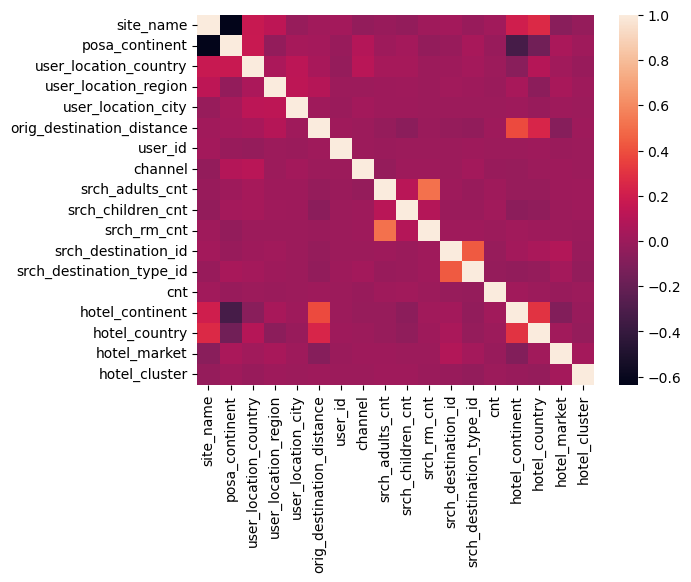

In [45]:
import seaborn as sns

sns.heatmap(
    corr_matrix,
    xticklabels=numerical_columns,
    yticklabels=numerical_columns,
)

In [9]:
timeseries_plot(df, 'date_time', 'ci_dt_diff', truncation=['1w'], agg=['mean', 'min', 'max'], filter_by_booking=True)

In [10]:
timeseries_plot(df, 'date_time', 'is_booking', truncation=['1mo'], agg=['count', 'sum'], log_y=True)

In [11]:
timeseries_plot_by_day(df, 'date_time', 'is_booking', agg='mean', log_y=True)

In [12]:
timeseries_plot(df, 'date_time', 'is_booking', truncation='1d', agg=['mean'], log_y=True)

In [13]:
timeseries_plot(df, 'date_time', 'co_ci_diff', truncation='1w', agg=['mean', 'median'])

In [14]:
timeseries_plot_by_day(df, 'date_time', 'co_ci_diff', agg='mean', filter_by_booking=True, log_y=True)

In [17]:
df['orig_destination_distance'].hist()['count'].max()

178735

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import figure


def histplot(df: pl.DataFrame, x: str, bin_count: int | None = None, **kwargs) -> Figure:
    hist = df[x].hist(bin_count=bin_count)
    plt.title(x)
    plt.xlabel(x)
    return sns.histplot(x=hist['break_point'].to_numpy().ravel(), weights=hist['count'].to_numpy().ravel(), bins=len(hist), **kwargs)


def conditional_histplot(df: pl.DataFrame, x: str, bin_count: int | None = None, conditional_column: str = 'is_booking', **kwargs) -> Figure:
    fig, ax = plt.subplots(ncols=1, figsize=(24, 5))
    df_true = df.filter(df[conditional_column])
    histplot(df_true, x, bin_count, ax=ax, color='green', label=f'p({x}|{conditional_column})', **kwargs)    
    df_false = df.filter(~df[conditional_column])
    histplot(df_false, x, bin_count, ax=ax, color='red', label=f'p({x}|!{conditional_column})', **kwargs)
    return fig

In [47]:
df.columns

['date_time',
 'site_name',
 'posa_continent',
 'user_location_country',
 'user_location_region',
 'user_location_city',
 'orig_destination_distance',
 'user_id',
 'is_mobile',
 'is_package',
 'channel',
 'srch_ci',
 'srch_co',
 'srch_adults_cnt',
 'srch_children_cnt',
 'srch_rm_cnt',
 'srch_destination_id',
 'srch_destination_type_id',
 'is_booking',
 'cnt',
 'hotel_continent',
 'hotel_country',
 'hotel_market',
 'hotel_cluster',
 'co_ci_diff',
 'ci_dt_diff']

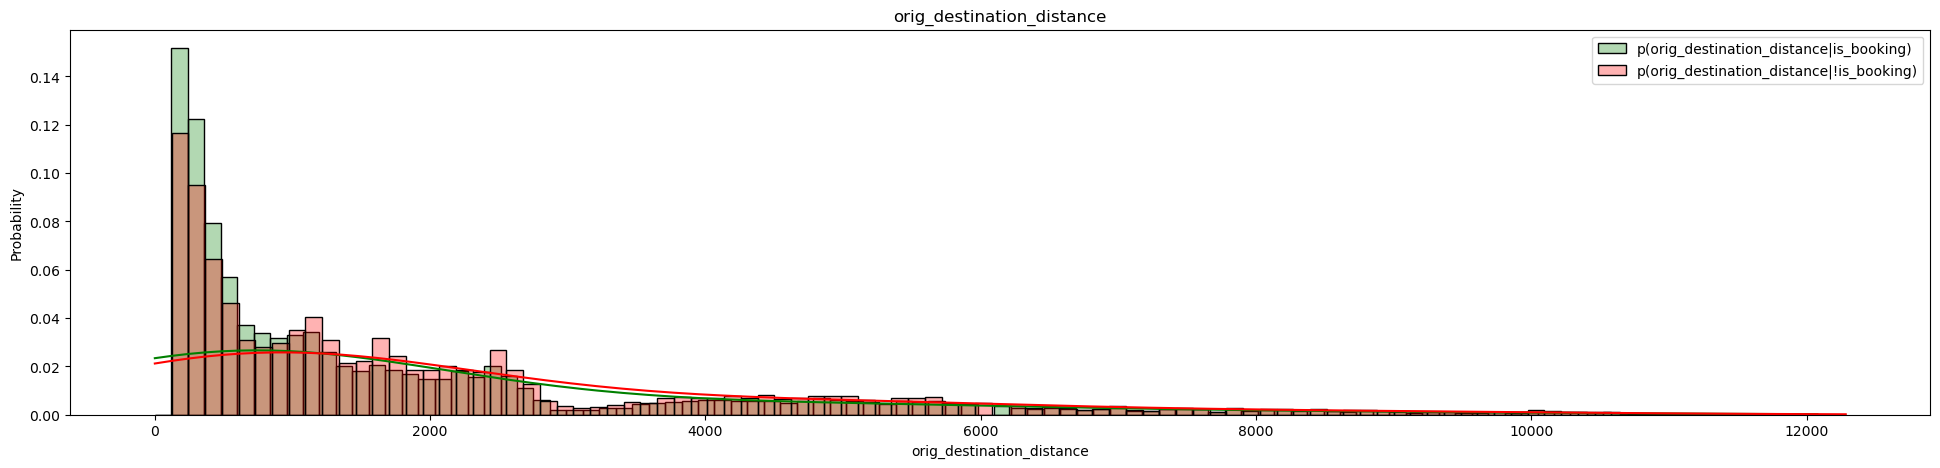

In [48]:
conditional_histplot(df, 'orig_destination_distance', bin_count=100, kde=True, alpha=0.3, stat='probability')
plt.legend()
plt.show()

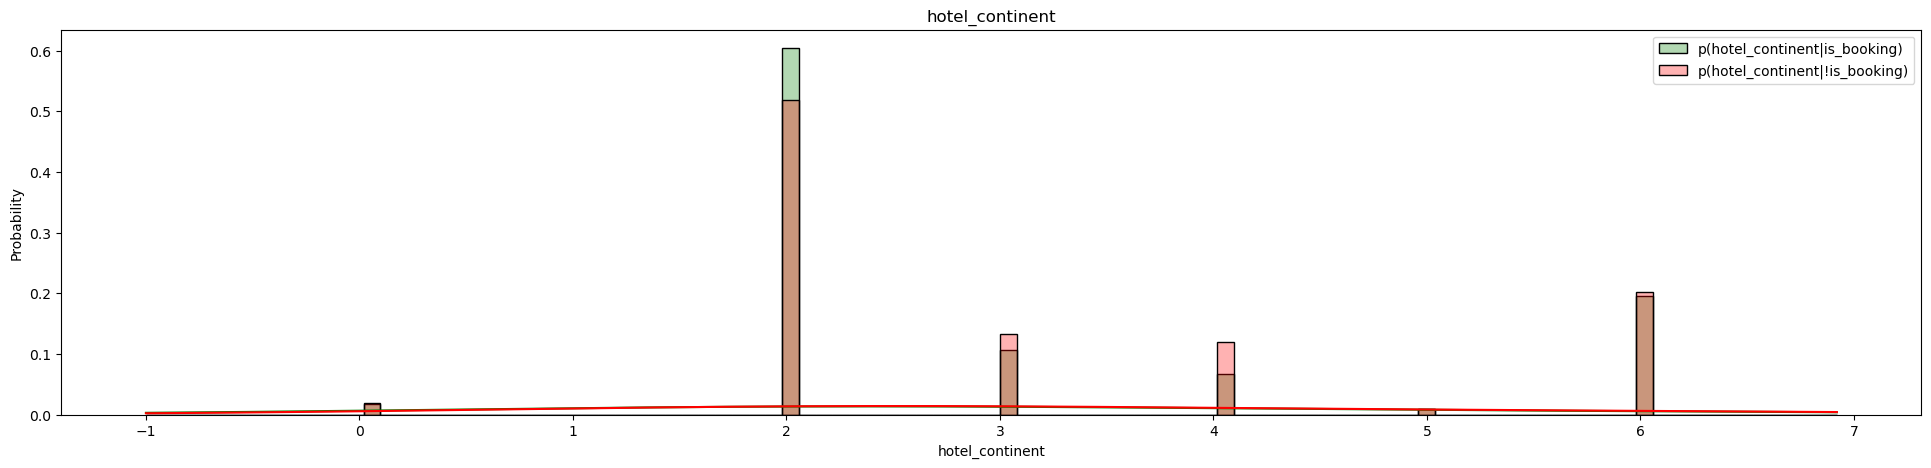

In [42]:
conditional_histplot(df, 'hotel_continent', bin_count=100, kde=True, alpha=0.3, stat='probability')
plt.legend()
plt.show()

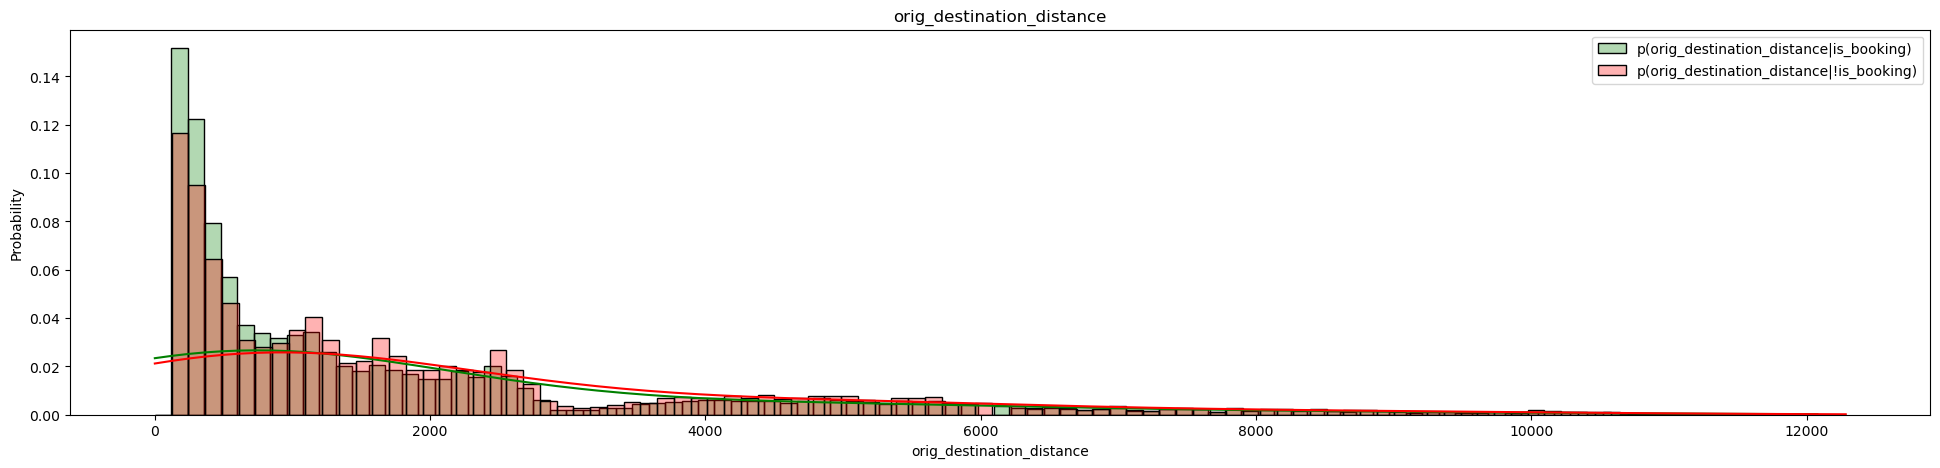

In [40]:
conditional_histplot(df, 'orig_destination_distance', bin_count=100, kde=True, alpha=0.3, stat='probability')
plt.legend()
plt.show()

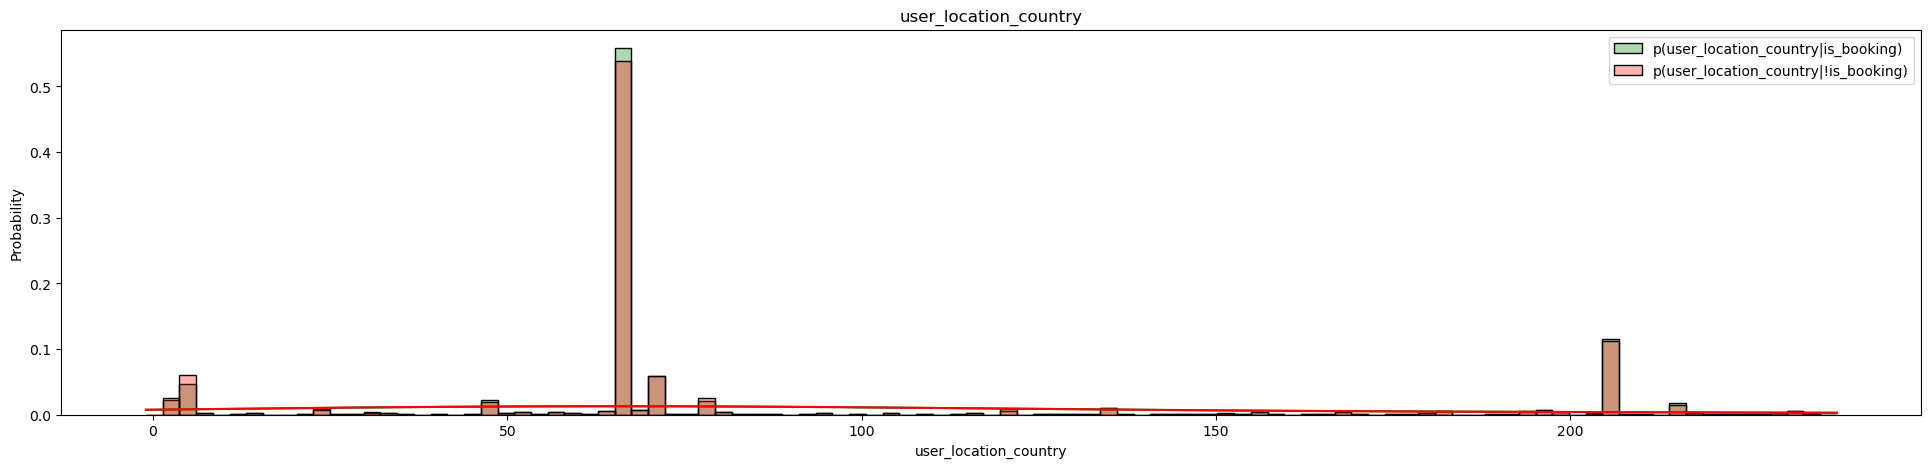

In [34]:
conditional_histplot(df, 'user_location_country', bin_count=100, kde=True, alpha=0.3, stat='probability')
plt.legend()
plt.show()

In [51]:
numerical_columns

['site_name',
 'posa_continent',
 'user_location_country',
 'user_location_region',
 'user_location_city',
 'orig_destination_distance',
 'user_id',
 'channel',
 'srch_adults_cnt',
 'srch_children_cnt',
 'srch_rm_cnt',
 'srch_destination_id',
 'srch_destination_type_id',
 'cnt',
 'hotel_continent',
 'hotel_country',
 'hotel_market',
 'hotel_cluster']

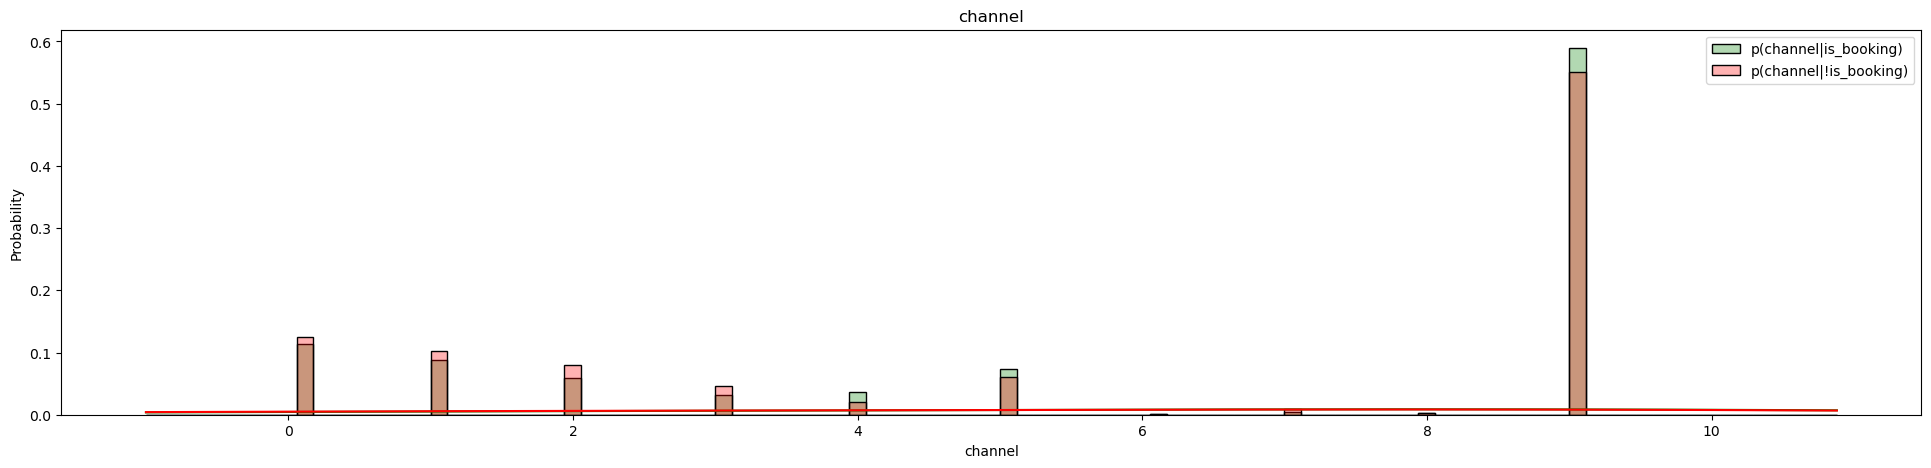

In [59]:
conditional_histplot(df, 'channel', bin_count=100, kde=True, alpha=0.3, stat='probability')
plt.legend()
plt.show()

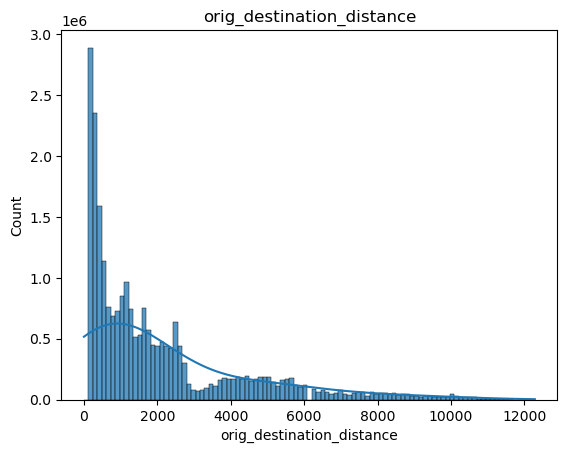

In [ ]:
histplot(df, 'orig_destination_distance', bin_count=100, kde=True, alpha=0.75)
plt.show()

In [20]:
grouped = df.select('hotel_cluster', 'is_booking').group_by('hotel_cluster')

grouped.sum() / grouped.len()

shape: (100, 2)
┌───────────────┬────────────┐
│ hotel_cluster ┆ is_booking │
│ ---           ┆ ---        │
│ f64           ┆ f64        │
╞═══════════════╪════════════╡
│ 59.0          ┆ 0.147139   │
│ 5.571429      ┆ 0.13103    │
│ 0.966667      ┆ 0.14633    │
│ 0.15          ┆ 0.072178   │
│ 2.475         ┆ 0.08983    │
│ …             ┆ …          │
│ 1.690909      ┆ 0.021112   │
│ 0.0           ┆ 0.018422   │
│ 7.166667      ┆ 0.083951   │
│ 1.875         ┆ 0.118992   │
│ 15.0          ┆ 0.023337   │
└───────────────┴────────────┘

In [21]:
grouped = df.select('hotel_cluster', 'is_booking').sort(by='hotel_cluster').group_by('hotel_cluster')
data = grouped.sum()

non_booking = grouped.len()['len'] - grouped.sum()['is_booking']
plot_data_raw = pl.DataFrame({
    'x': data['hotel_cluster'].cast(pl.String),
    'positive': data['is_booking'],
    'counts': grouped.len()['len'],
    'prob': data['is_booking'] / grouped.len()['len'],
    'negative': non_booking,
}).sort(by='counts', descending=False)

In [22]:
plot_data = pl.DataFrame({
    'x': pl.concat([plot_data_raw['x'], plot_data_raw['x']]),
    'y': pl.concat([plot_data_raw['positive'], plot_data_raw['negative']]),
    'color': ['Is booking'] * len(plot_data_raw) + ['Clicked, not booked'] * len(plot_data_raw)
})

px.bar(plot_data.to_pandas(), x='y', y='x', color='color', orientation='h')

. n=5, r=3

$MAP = \frac{1}{5}\sum_{i=1}^{n} Precision@i \cdot (5 - i)$

In [23]:
plot_data_sorted_by_pos = plot_data_raw.sort(by='prob', descending=False)
plot_data = pl.DataFrame({
    'x': pl.concat([plot_data_sorted_by_pos['x'], plot_data_sorted_by_pos['x']]),
    'y': pl.concat([plot_data_sorted_by_pos['positive'] / plot_data_sorted_by_pos['counts'], plot_data_sorted_by_pos['negative'] / plot_data_sorted_by_pos['counts']]),
    'color': ['Is booking'] * len(plot_data_sorted_by_pos) + ['Clicked, not booked'] * len(plot_data_sorted_by_pos)
})

px.bar(plot_data.to_pandas(), x='y', y='x', color='color', orientation='h')

In [24]:
grouped = df.select('hotel_cluster', 'date_time').group_by('hotel_cluster')
appearance = grouped.min()

appearance['date_time'].min(), appearance['date_time'].max()

(datetime.datetime(2013, 1, 7, 0, 0, 2),
 datetime.datetime(2013, 1, 7, 3, 42, 31))

In [25]:
grouped = df.select('hotel_cluster', 'date_time').group_by('hotel_cluster')
appearance = grouped.max()

appearance['date_time'].min(), appearance['date_time'].max()

(datetime.datetime(2014, 12, 31, 23, 26, 28),
 datetime.datetime(2014, 12, 31, 23, 59, 59))

In [26]:
df['is_booking'].mean()

0.07965674702875288

In [27]:
def make_hist(df: pl.DataFrame, col: str, bin_count: int | None = None) -> Figure:
    hist = df[col].hist(bin_count=bin_count).select('break_point', 'count')
    return px.bar(hist.to_pandas(), x='break_point', y='count', 
                  title=f'{col} histogram', labels={
                      'x': col,
                      'y': 'count'
                  }, 
                  range_x=[hist['break_point'][0], hist['break_point'][-2]],
                  range_y=[hist['count'].min(), hist['count'].max()],
                  orientation='v')

<Axes: title={'center': 'ci_dt_diff'}, xlabel='ci_dt_diff', ylabel='Count'>

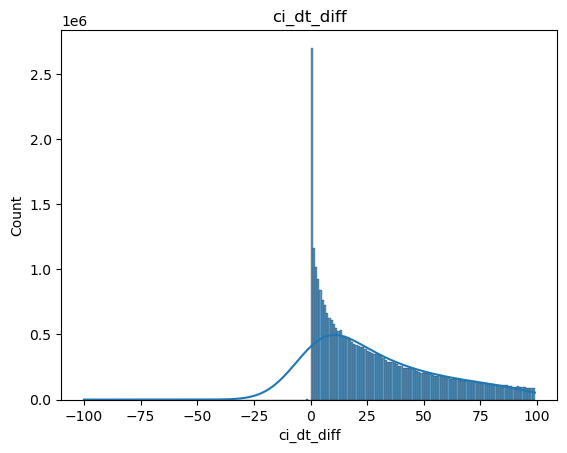

In [39]:
histplot(df.filter(df['ci_dt_diff'] < 100, df['ci_dt_diff'] > -100), 'ci_dt_diff', bin_count=200, kde=True, alpha=0.75)

In [52]:
(df['ci_dt_diff'] < 0).sum()

8457

In [51]:
bardata.filter(bardata['ci_dt_diff'] < 0)['len'].sum()

7294

In [50]:
bardata = df.filter(df['ci_dt_diff'] < 300, df['ci_dt_diff'] > -100).select('ci_dt_diff').group_by('ci_dt_diff').len()
px.bar(bardata.to_pandas(), x='ci_dt_diff', y='len')

In [53]:
make_hist(df.filter(df['ci_dt_diff'] < 500, df['ci_dt_diff'] > 0), 'ci_dt_diff', bin_count=500)

In [31]:
booked_counts = df.select('user_id', 'hotel_cluster').group_by('user_id', 'hotel_cluster').len()
make_hist(booked_counts, 'len')

In [32]:
booked_counts = df \
    .select('user_id', 'hotel_cluster', 'date_time') \
    .with_columns(pl.col('date_time').dt.truncate('1d')) \
    .group_by('user_id', 'hotel_cluster', 'date_time').len()
make_hist(booked_counts, 'len')

In [33]:
booked_counts = df \
    .select('user_id', 'hotel_cluster', 'date_time') \
    .with_columns(pl.col('date_time').dt.truncate('1d')) \
    .group_by('user_id', 'date_time').n_unique()

In [48]:
make_hist(booked_counts, 'hotel_cluster', bin_count=50)

In [46]:
df['user_id'].n_unique()

1198786

In [47]:
weird_users = booked_counts.filter(booked_counts['hotel_cluster'] > 9)['user_id'].unique()
weird_users

shape: (153_205,)
Series: 'user_id' [u32]
[
	13
	14
	33
	36
	47
	…
	1198709
	1198713
	1198737
	1198776
	1198783
]

In [29]:
lens = df.select('user_id', 'date_time').with_columns(
    pl.col('date_time').dt.truncate('8h')
).group_by('user_id', 'date_time').len()

In [30]:
make_hist(lens, 'len')

In [134]:
make_hist(df, 'orig_destination_distance', bin_count=300)

In [68]:
make_hist(df, 'posa_continent')

In [70]:
make_hist(df, 'srch_adults_cnt')

In [71]:
make_hist(df, 'srch_children_cnt')

In [27]:
(df['co_ci_diff'] < 0).sum()  # ?

798

In [26]:
df['co_ci_diff'].min()

-3651

In [74]:
make_hist(df, 'co_ci_diff', bin_count=200)

In [79]:
make_hist(df, 'srch_rm_cnt')

In [80]:
make_hist(df, 'cnt')

In [41]:
import plotly.graph_objects as go
import numpy as np


def get_box_data(df: pl.DataFrame, col: str) -> dict[str, list[float]]:
    s = df[col]
    
    res = {
        'q1': np.array([s.quantile(0.25)]),
        'q3': np.array([s.quantile(0.75)]),
        'median': np.array([s.median()]),
        'mean': np.array([s.mean()]),
        'sd': np.array([s.std()]),
        'notched': False
    }
    iqr = res['q3'] - res['q1']
    res['upperfence'] = res['q3'] + 1.5 * iqr
    res['lowerfence'] = res['q1'] - 1.5 * iqr
    return res


def boxplot(df: pl.DataFrame, x: str, y: str) -> Figure:
    assert y in numerical_columns
    assert x in categorical_columns
    


fig = Figure()
fig.add_trace(go.Box(**get_box_data(df, 'orig_destination_distance'), name='Box', x0=1))
fig.add_trace(go.Box(**get_box_data(df, 'orig_destination_distance'), name='Box', x0=2))
fig.update_layout(
    xaxis = dict(
        tickmode='array',
        tickvals=[1, 2],
        ticktext=['Oh', 'yeah']
    )
)

fig.show()

In [63]:
import datashader as ds
import datashader.transfer_functions as tf

canvas = ds.Canvas()
agg = canvas.points(df.select('orig_destination_distance', 'srch_children_cnt').to_pandas(), 'orig_destination_distance', 'srch_children_cnt')

In [64]:
visualization_df['srch_children_cnt'].value_counts()

srch_children_cnt
0    29766143
1     4219414
2     3014356
3      491086
4      138308
5       19573
6       15415
7        2699
8        2416
9         883
Name: count, dtype: int64

In [65]:
agg.values = agg.values.astype(np.float32)
zeroes_idx = np.where(agg.values == 0)
agg.values = np.log(agg.values)
agg.values[zeroes_idx] = np.nan

C:\Users\tyoma\AppData\Local\Temp\ipykernel_3748\999520010.py:3: RuntimeWarning:

divide by zero encountered in log



In [66]:
import plotly.express as px

agg = tf.spread(agg, name='spread 1px')
fig = px.imshow(agg, origin='lower', labels={'color':'Log10(count)'})
fig.update_traces(hoverongaps=False)
fig.update_layout(coloraxis_colorbar={'title': 'Count', 'tickprefix': '1.e'})
fig.show()